In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Data Pre-Processing for Train Data

In [2]:
path = 'C:/Users/DEVENDRA/Desktop/ml_database_7/flight_price_train.xlsx'
pd.set_option('display.max_columns', None)

In [3]:
tra = pd.read_excel(path)

In [4]:
train_df = tra

In [5]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [7]:
train_df['Duration'].value_counts().head(10)

2h 50m    550
1h 30m    386
2h 45m    337
2h 55m    337
2h 35m    329
3h        261
2h 20m    238
2h 30m    220
2h 40m    158
1h 25m    135
Name: Duration, dtype: int64

In [8]:
# train_df.isnull().sum()
train_df.dropna(inplace = True)

In [9]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
# from desc we can see that date_of_journy is object data type
# we have to convert it into timestamp for use this columns as prediction properly
# .dt.day == extract only day
# .dt.month == extract only month
# pd.oto_datetime == convert string to datetime
train_df['Journy_date'] = pd.to_datetime(train_df.Date_of_Journey, format = '%d/%m/%Y').dt.day

In [11]:
train_df['Journy_month'] = pd.to_datetime(train_df.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [12]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_date,Journy_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [13]:
train_df.drop(columns= 'Date_of_Journey', axis = 1, inplace = True)

In [14]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_date,Journy_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
# departure time is when a plane leaves the gate.

# extract hours
train_df['dep_hours'] = pd.to_datetime(train_df['Dep_Time']).dt.hour

# extract minutes
train_df['dep_min'] = pd.to_datetime(train_df['Dep_Time']).dt.minute

# droping teh dep_time for the dataset
train_df.drop(['Dep_Time'], axis = 1, inplace = True)

In [16]:
train_df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_date,Journy_month,dep_hours,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [17]:
# arrival time is when the plan pulls up the gate.

# extract hours
train_df['arr_hours'] = pd.to_datetime(train_df.Arrival_Time).dt.hour

# extract minutes
train_df['arr_min'] = pd.to_datetime(train_df.Arrival_Time).dt.minute

# drop arrival_time
train_df.drop(['Arrival_Time'], axis = 1, inplace = True)

In [18]:
train_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journy_date,Journy_month,dep_hours,dep_min,arr_hours,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [19]:
duration = list(train_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'  # adds 0 minute
        else:
            duration[i] = '0h ' + duration[i]          # adds o hours

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) # extract only hours
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))# extract only minutes

In [20]:
train_df['duration_hours'] = duration_hours
train_df['duration_mins'] = duration_mins

In [21]:
train_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journy_date,Journy_month,dep_hours,dep_min,arr_hours,arr_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [22]:
train_df.drop(['Duration'], axis = 1, inplace = True)

## Handling Categorical Data

In [23]:
# 1. Nominal data -- data not in order -- One hot encoder
# 2. ordinal data -- data are in order -- lable encoder

In [24]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [25]:
# g = sns.catplot(y = 'Price', x = 'Airline', data = train_df.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
# plt.show()

In [26]:
# as airline is nomila data we can use one hot encoder

Airline = train_df[['Airline']]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [28]:
# source is also a nominal data
Source = train_df[['Source']]

Source = pd.get_dummies(Source, drop_first=True)

In [29]:
train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [30]:
# destination is also nomial data 

Destination = train_df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)

In [31]:
train_df['Route'].head(10)

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
5                CCU → BLR
6          BLR → BOM → DEL
7          BLR → BOM → DEL
8          BLR → BOM → DEL
9          DEL → BOM → COK
Name: Route, dtype: object

In [32]:
# route and total stop is related
# additional info ha 80% of no_info

train_df.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [33]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journy_date,Journy_month,dep_hours,dep_min,arr_hours,arr_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [34]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
# total_stop is ordinal data type
# here values are assign with correspoding keys

train_df.replace({'non-stop':0, '1 stop':1, '2 stops':2,'3 stops':3, '4 stops':4}, inplace = True)


In [36]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journy_date,Journy_month,dep_hours,dep_min,arr_hours,arr_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [37]:
data_train = pd.concat([train_df, Airline, Source, Destination], axis = 1)

In [38]:
# drop columns which are converted into dummies variable

data_train.drop(['Airline','Source','Destination'], axis = 1, inplace = True)

In [39]:
data_train.head()

,Total_Stops,Price,Journy_date,Journy_month,dep_hours,dep_min,arr_hours,arr_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
data_train.shape

(10682, 30)

# Data Pre-processing for Test Data

In [41]:
# we cannot do data preprocessing fro combined data set (train, test), bcaus of data lekeage
# and it may lead to overfittint problam and it will happen unknowingly
# best practice is do data pre-proc sepretaly for train and test data.

In [42]:
path = 'C:/Users/DEVENDRA/Desktop/ml_database_7/flight_price_test.xlsx'
pd.set_option('display.max_columns', None)

In [43]:
test_df = pd.read_excel(path)

In [44]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [46]:
test_df['Duration'].value_counts().head(10)

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
2h 35m      70
2h 30m      58
2h 20m      48
2h 40m      38
13h 20m     32
Name: Duration, dtype: int64

In [47]:
# train_df.isnull().sum()
test_df.dropna(inplace = True)

In [48]:

test_df.isnull().sum()

# from desc we can see that date_of_journy is object data type
# we have to convert it into timestamp for use this columns as prediction properly
# .dt.day == extract only day
# .dt.month == extract only month
# pd.oto_datetime == convert string to datetime

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [49]:
test_df['Journy_date'] = pd.to_datetime(test_df.Date_of_Journey, format = '%d/%m/%Y').dt.day


In [50]:

test_df['Journy_month'] = pd.to_datetime(test_df.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [51]:
test_df.drop(columns= 'Date_of_Journey', axis = 1, inplace = True)

In [52]:
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journy_date,Journy_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [53]:
# departure time is when a plane leaves the gate.

# extract hours
test_df['dep_hours'] = pd.to_datetime(test_df['Dep_Time']).dt.hour

# extract minutes
test_df['dep_min'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

# droping teh dep_time for the dataset
test_df.drop(['Dep_Time'], axis = 1, inplace = True)

In [54]:
test_df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journy_date,Journy_month,dep_hours,dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20


In [55]:
# arrival time is when the plan pulls up the gate.

# extract hours
test_df['arr_hours'] = pd.to_datetime(test_df.Arrival_Time).dt.hour

# extract minutes
test_df['arr_min'] = pd.to_datetime(test_df.Arrival_Time).dt.minute

# drop arrival_time
test_df.drop(['Arrival_Time'], axis = 1, inplace = True)

In [56]:
test_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journy_date,Journy_month,dep_hours,dep_min,arr_hours,arr_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20


In [57]:
duration = list(test_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'  # adds 0 minute
        else:
            duration[i] = '0h ' + duration[i]          # adds o hours

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) # extract only hours
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))# extract only minutes

In [58]:
test_df['duration_hours'] = duration_hours
test_df['duration_mins'] = duration_mins

In [59]:
test_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journy_date,Journy_month,dep_hours,dep_min,arr_hours,arr_min,duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,4,0


In [60]:
test_df.drop(['Duration'], axis = 1, inplace = True)

## Handling Categorical Data

In [61]:
# 1. Nominal data -- data not in order -- One hot encoder
# 2. ordinal data -- data are in order -- lable encoder

In [62]:
test_df['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [63]:
# g = sns.catplot(y = 'Price', x = 'Airline', data = train_df.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
# plt.show()

In [64]:
# as airline is nomila data we can use one hot encoder

Airline = test_df[['Airline']]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [65]:
test_df['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [66]:
# source is also a nominal data
Source = test_df[['Source']]

Source = pd.get_dummies(Source, drop_first=True)

In [67]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [68]:
test_df['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [69]:
# destination is also nomial data 

Destination = test_df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)

In [70]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [71]:
test_df['Route'].head(10)

0    DEL → BOM → COK
1    CCU → MAA → BLR
2    DEL → BOM → COK
3    DEL → BOM → COK
4          BLR → DEL
5    DEL → BOM → COK
6    BLR → TRV → DEL
7    CCU → HYD → BLR
8          CCU → BLR
9    CCU → BOM → BLR
Name: Route, dtype: object

In [72]:
# route and total stop is related
# additional info ha 80% of no_info

test_df.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [73]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Journy_date,Journy_month,dep_hours,dep_min,arr_hours,arr_min,duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50


In [74]:
test_df['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [75]:
# total_stop is ordinal data type
# here values are assign with correspoding keys

test_df.replace({'non-stop':0, '1 stop':1, '2 stops':2,'3 stops':3, '4 stops':4}, inplace = True)


In [76]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Journy_date,Journy_month,dep_hours,dep_min,arr_hours,arr_min,duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [77]:
data_test = pd.concat([test_df, Airline, Source, Destination], axis = 1)

In [78]:
# drop columns which are converted into dummies variable

data_test.drop(['Airline','Source','Destination'], axis = 1, inplace = True)

In [79]:
data_test.head()

,Total_Stops,Journy_date,Journy_month,dep_hours,dep_min,arr_hours,arr_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [80]:
data_test.shape

(2671, 28)

# Feature Selection

In [81]:
# 1. heatmap
# 2. feature_importance_
# 3. SelectKBest

In [82]:
data_train.shape

(10682, 30)

In [83]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journy_date', 'Journy_month', 'dep_hours',
       'dep_min', 'arr_hours', 'arr_min', 'duration_hours', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [84]:
x = data_train.loc[:,['Total_Stops','Journy_date', 'Journy_month', 'dep_hours',
       'dep_min', 'arr_hours', 'arr_min', 'duration_hours', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [85]:
x.head()

,Total_Stops,Journy_date,Journy_month,dep_hours,dep_min,arr_hours,arr_min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [86]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

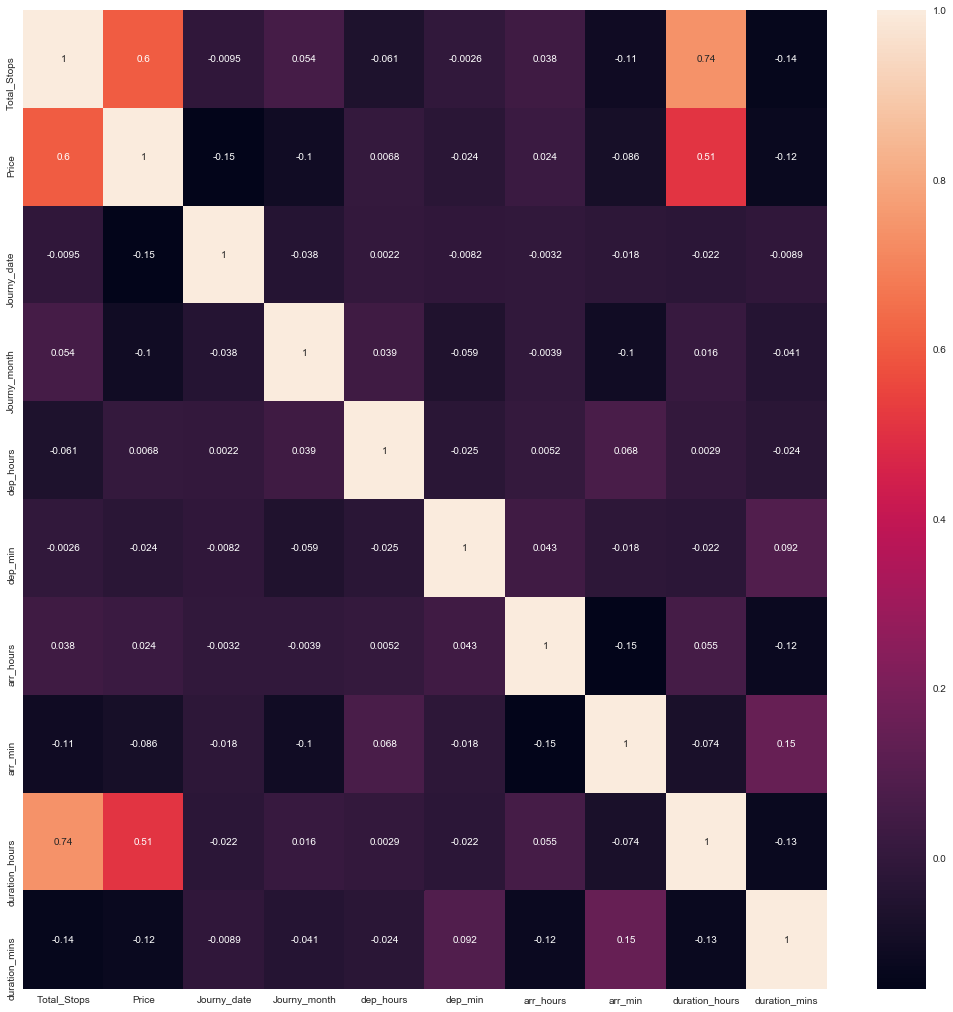

In [87]:
# find relationship between independent variable with depenedent variable

plt.figure(figsize = (18,18))
sns.heatmap(train_df.corr(), annot = True)

In [88]:
# Importance feature using ExtratreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
select  = ExtraTreesRegressor()
select.fit(x, y)

ExtraTreesRegressor()

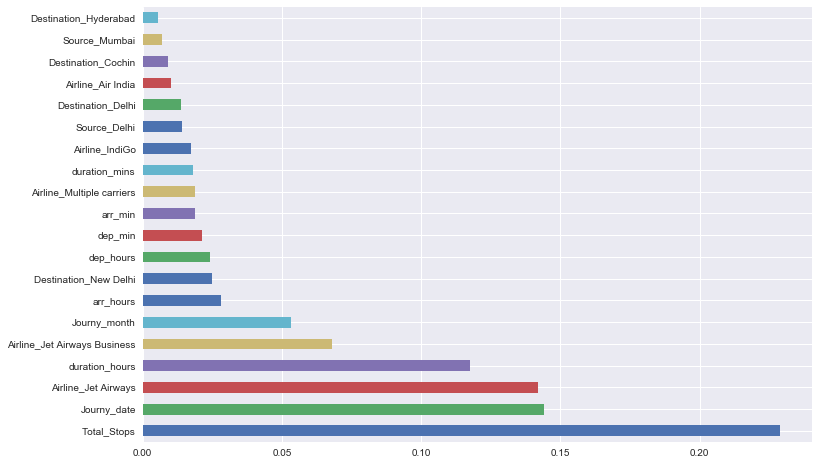

In [89]:
plt.figure(figsize = (12,8))
feat_imp = pd.Series(select.feature_importances_, index = x.columns)
feat_imp.nlargest(20).plot(kind = 'barh')
plt.show()

# Fitting Model Using Random Forest

In [ ]:
# check rmse score

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [94]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [208]:
y_pred = reg_rf.predict(x_test)

In [209]:
reg_rf.score(x_train, y_train) # r2 score

0.9554388960312925

In [211]:
reg_rf.score(x_test, y_test)

0.8092763690479843

C:\Users\DEVENDRA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


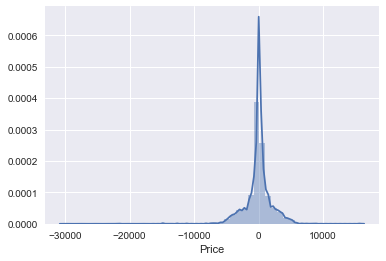

In [210]:
sns.distplot(y_pred-y_test)

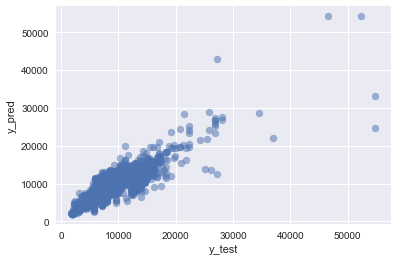

In [212]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel('y_pred')
plt.show()

In [213]:
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 1244.3173417436565
MSE 4474981.923644838
RMSE 2115.4153076038847


In [214]:
metrics.r2_score(y_test, y_pred)

0.8092763690479843

# Hyperparameter Tuning

In [ ]:
# 1. randomizedsearchcv
# 2. Grdisearchcv

# assign hyperparametre is form of dictionary
# fit the model 
# check the best set of parameters

In [215]:
from sklearn.model_selection import RandomizedSearchCV

In [235]:
# randomizedsearchcv

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# number of feature to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in trees 
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

# minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [236]:
# create the random grid
random_grid = {'n_estimators':n_estimators,
               'max_features':max_feature,
               'max_depth':max_dept,
               'min_samples_split':min_sample_split,
               'min_samples_leaf':min_sample_leaf}

In [237]:
# random search for parameters, usnig 5 fold cross validation
# search across 100 different combination
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=1)

In [238]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [239]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [240]:
predict = rf_random.predict(x_test)

C:\Users\DEVENDRA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


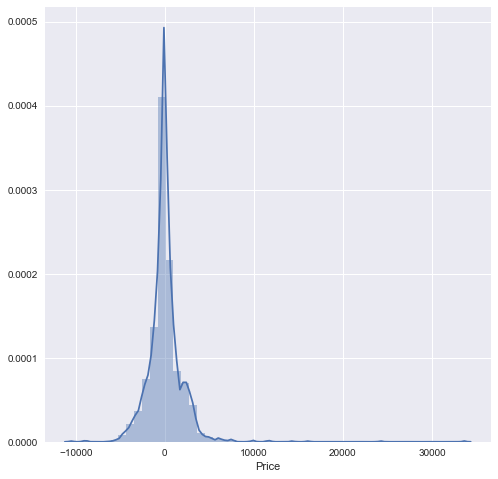

In [242]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-predict)
plt.show()

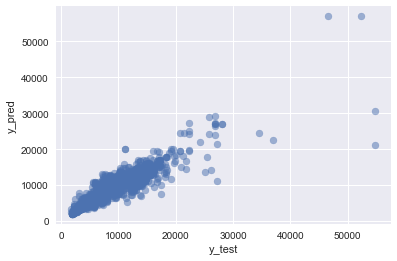

In [243]:
plt.scatter(y_test, predict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel('y_pred')
plt.show()

In [97]:
from sklearn import metrics

# print('MAE', metrics.mean_absolute_error(y_test, predict))
# print('MSE', metrics.mean_squared_error(y_test, predict))
# print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

In [245]:
metrics.r2_score(y_test, predict)

0.8264919122514414

# save the model for reuse it

In [252]:
import pickle

#open a file, where we want to save the file
file = open('flight_rf.pkl', 'wb')

#dump a file
pickle.dump(rf_random, file)

In [91]:
import pickle
model = open('flight_rf.pkl', 'rb')

forest = pickle.load(model)

In [95]:
y_prediction = forest.predict(x_test)

In [98]:
metrics.r2_score(y_test, y_prediction)

0.8264919122514414